<a href="https://colab.research.google.com/github/ommishra0707/Airbnb-Booking-analysis/blob/main/Mishra_Om_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mounting from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing csv files

airbnb_df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [ ]:
#First ten rows

airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
# Last ten rows of Dataset

airbnb_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Shape of a Airbnb DataFrame

airbnb_df.shape

(48895, 16)

In [ ]:
# Information about the Airbnb DataFrame

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Description of the Airbnb DataFrame

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# list of columns

list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Replacing the NULL values

airbnb_df['reviews_per_month'].fillna(0, inplace=True) 

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df['last_review'].fillna(0 , inplace=True)

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# verifying the null values are filled

airbnb_df.isnull().count()

id                                48895
name                              48895
host_id                           48895
host_name                         48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [ ]:
# number of unique airbnb  

airbnb_df['name'].nunique()

47905

In [ ]:
# checking for duplicate values

airbnb_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

so there is no Duplicate Rows in a Dataframe

In [ ]:
# number of unique neighbourhood group

airbnb_df['neighbourhood_group'].nunique()

5

In [ ]:
# pairwise correlation of all columns in the dataframe

corr_df = airbnb_df.corr()
corr_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


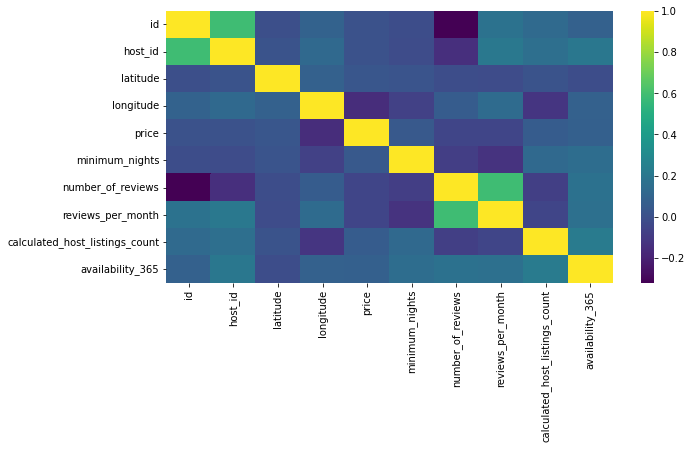

In [ ]:
# plotting of correlation Graph

plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='viridis')


The review_per_month and number_of_review has a good correlation.

but from the pearson correlation we got to know that there are not many strong correlations.
 

###Q) How many different Airbnb listings for the different neighbourhoods are there?

In [ ]:
# number of airbnb in different neighbourhood group

diff = airbnb_df[['neighbourhood_group','id']]
count_of_neighbourhood_group = diff.groupby(['neighbourhood_group'], as_index = False).count().rename(columns={'id':'count'})

print(count_of_neighbourhood_group)


  neighbourhood_group  count
0               Bronx   1091
1            Brooklyn  20104
2           Manhattan  21661
3              Queens   5666
4       Staten Island    373


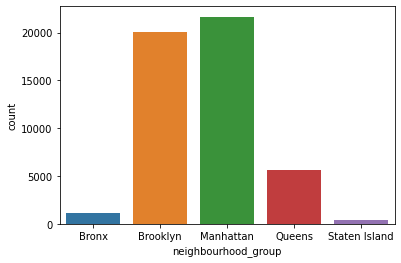

In [ ]:
# Plotting Graph 

sns.barplot(x='neighbourhood_group',
            y = 'count',
            data = count_of_neighbourhood_group,
            )
 
# Show the plot
plt.show()





1.   manhattan has most no. of airbnb listing
2.   staten island has least no. of airbnb listing







### Q.)What will be the Average price of airbnb with respect to different neighbourhood group  ?


In [ ]:
# Avg price in different neighbourhood group 

avg = airbnb_df.groupby(['neighbourhood_group']).mean('price').rename(columns={'price':'avg_price'}).reset_index()

avg

,neighbourhood_group,id,host_id,latitude,longitude,avg_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.475655,2.233731,165.758937
1,Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.049790,2.284371,100.232292
2,Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,0.976782,12.791330,111.979410
3,Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.567076,4.060184,144.451818
4,Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.576381,2.319035,199.678284


In [ ]:
airbnb_df[['neighbourhood_group','price']]

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80
...,...,...
48890,Brooklyn,70
48891,Brooklyn,40
48892,Manhattan,115
48893,Manhattan,55


In [ ]:
#Avg price in different Neighbourhood Group

avg_price = airbnb_df[['neighbourhood_group','price']]

avg = avg_price.groupby(['neighbourhood_group']).agg({'price':'mean'}).rename(columns = {'price':'avgprice'}).reset_index()

avg

,neighbourhood_group,avgprice
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


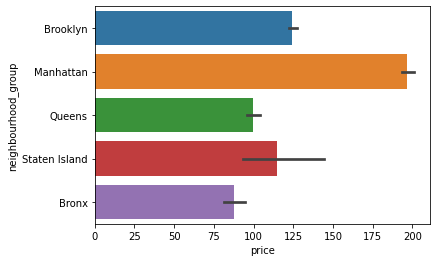

In [ ]:
# plotting graph 

sns.barplot(y = 'neighbourhood_group',
            x = 'price',
            data = avg_price,
            orient = 'h')
 
# Show the plot
plt.show()



*  Manhanttan has the highest average price among all areas.
*  Brooklyn has the second highest average price.
*  Bronx has the lowest average price among all areas.



In [ ]:
# number of unique neighbourhood

airbnb_df.neighbourhood.nunique()

221

In [ ]:
#top number of airbnb listing in different neighbourhood

top_neighbourhood = airbnb_df['neighbourhood'].value_counts().reset_index()
top_neighbourhood.head(20)

,index,neighbourhood
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545




*   williamsburg has the highest no. of listings which is about 3920.

*  even the Bedford-Stuyvesant has good no. of listings near to 3714.



Q.) How many types of Room types are there and their distribution ?





In [ ]:
#different room type

dff = airbnb_df.groupby(['room_type'],as_index = False).agg({'calculated_host_listings_count':'count'}).rename(columns={'calculated_host_listings_count':'count'})
dff

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160




1.   There are more than 25 k Entire room/apt
2.   22k - privates rooms





Text(0.5, 0, 'Room_type')

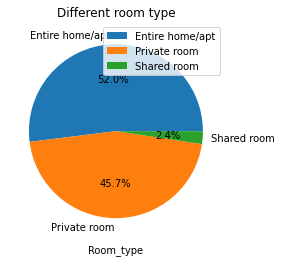

In [ ]:
#plotting graph

dff.plot.pie(y='count',labels = dff['room_type'],autopct="%.1f%%");

plt.title('Different room type')
plt.ylabel('')
plt.xlabel('Room_type')



*   shared room has the minimum number of listings (2.4%) among all others room types.  

*   Entire Home/apt has the maximum number of listings which is approx. 52%.

*   private room has decent no. of listing (45.7%).
   





In [ ]:
#average price of all airbnb

airbnb_df['price'].agg({'price':'mean'}).reset_index()

,index,price
0,price,152.720687


Q) what will be the average price according to the type of room and different neighbourhood group?

In [ ]:
#average price based on type of room

ap = airbnb_df.groupby(['room_type']).agg({'price':'mean'}).rename(columns={'price':'avg_price'}).reset_index()
ap

,room_type,avg_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


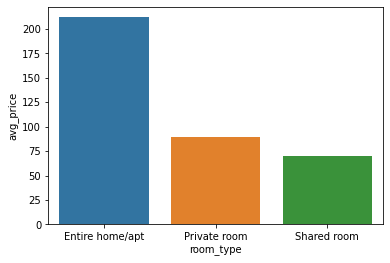

In [ ]:
#plotting of chart

sns.barplot(x = 'room_type',
            y = 'avg_price',
            data = ap)



*   For the Entire home/apt the avg. rate is approx. 211 $.

*   for the Private room the avg. rate is approx. 89 $.

*   For the Shared room the avg. rate is approx. 70 $ .



In [ ]:
#different room type in different neighbourhood group with avg. price

avg_room_price = airbnb_df.groupby(['neighbourhood_group','room_type']).agg({'price':'mean'}).rename(columns={'price':'avg_price'}).reset_index()
avg_room_price

,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


Text(0, 0.5, 'price')

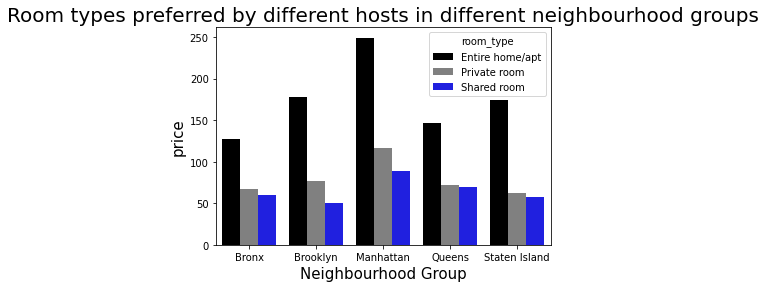

In [ ]:
# plotting graph

sns.barplot(
    x = 'neighbourhood_group',
    y = 'avg_price',
    hue = 'room_type',
    data = avg_room_price,
    palette = ['black', 'grey', 'blue']
)
plt.title('Room types preferred by different hosts in different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('price', fontsize = 15)



*   Manhattan has the highest rate for Entire room/apt and Private rooms with respect to other locations.

* staten island and queens has the approx. same rates for private room and shared room.

*  Brooklyn has the lowest rate for shared room compared to others.










### Q.) Relationship between price v/s numbers of reviews ?

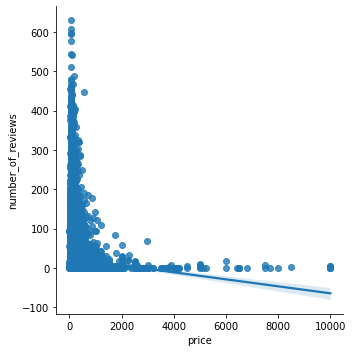

In [ ]:
#plotting graph

sns.lmplot(x='price', y="number_of_reviews", data=airbnb_df);



*   By looking at the graph we can say that mostly people live where the price is minimum



### Q.) which neighbourhood group has got the most reviews?





In [ ]:
# Avg. reviews with respect to their neighbourhood group
most_reviewed = airbnb_df.groupby(['neighbourhood_group'], as_index = False).agg({'number_of_reviews':'mean'}).rename(columns={'number_of_reviews':'Reviews'})
most_reviewed

,neighbourhood_group,Reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


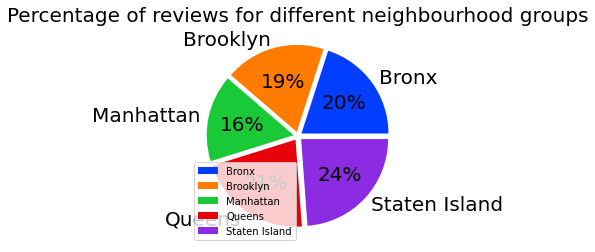

In [ ]:
# plotting the pie chart
graph = most_reviewed.plot.pie(
    y = 'Reviews',
    labels = most_reviewed['neighbourhood_group'],
    colors = sns.color_palette('bright'),
    autopct = '%.0f%%',
    explode = [0.05, 0.05, 0.05, 0.05, 0.05],
    fontsize = 20
)
graph.set_title('Percentage of reviews for different neighbourhood groups', fontsize = 20
)
graph.set_ylabel('')

plt.show()



*   staten island has the most numbers of Reviews

*  manhanttan has the least no. of reviews



